<h3>Building a Cancer Classifier using Random Forest</h3>

<h4>1- Load The Required Packages</h4>

In [1]:
import pandas as pd                                              #data manupilation
from sklearn.model_selection import train_test_split             #splitting the data to train and test
from sklearn import tree                                         #running a decision tree
from sklearn.ensemble import RandomForestClassifier              #running a random forest
from sklearn import datasets                                     #saved datasets

from sklearn import metrics                                      #assessing model performance
from sklearn.metrics import classification_report                #assessing model performance
from sklearn.metrics import confusion_matrix                     #assessing model performance
import matplotlib.pyplot as plt                                  #visualize model performance

pd.set_option('display.max_columns', 30)                         #display all columns in your data

<h4>2- Load The Data</h4>

In [2]:
cancer =
X=      #define your features
Y=      #define the target variable
X.head()                                                        #view the first few rows from your features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#print the dimensions of the dataset
print()

(569, 30)


In [4]:
#let's look at column names


MultiIndex([(            'mean radius',),
            (           'mean texture',),
            (         'mean perimeter',),
            (              'mean area',),
            (        'mean smoothness',),
            (       'mean compactness',),
            (         'mean concavity',),
            (    'mean concave points',),
            (          'mean symmetry',),
            ( 'mean fractal dimension',),
            (           'radius error',),
            (          'texture error',),
            (        'perimeter error',),
            (             'area error',),
            (       'smoothness error',),
            (      'compactness error',),
            (        'concavity error',),
            (   'concave points error',),
            (         'symmetry error',),
            ('fractal dimension error',),
            (           'worst radius',),
            (          'worst texture',),
            (        'worst perimeter',),
            (             'worst a

In [5]:
#let's summarize the data


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h4>3- Split to Train and Test</h4>

In [6]:
#split the data to 70% train and 30% test
x_train,x_test,y_train,y_test = 

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


<h4>4- Train your model: Random Forest</h4>

In [7]:
rf_model =         #define the model
                                       #fit the model (train)
                                       #predict on new observations

#what is the accuracy of this model?

0.9773869346733668

Let's visualize this tree! (https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


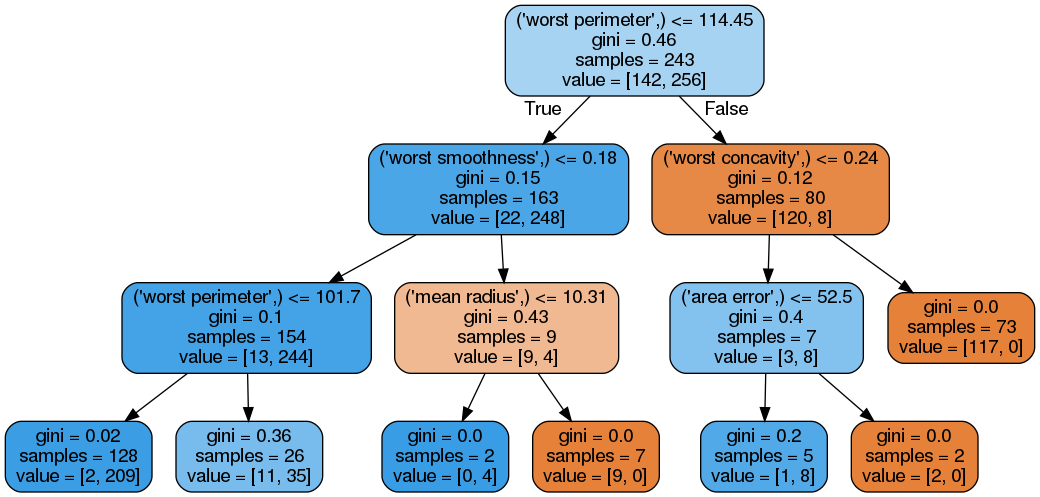

In [8]:
#select which tree do you want to visualize
selected_tree=2

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data2 = StringIO()
export_graphviz(rf_model.estimators_[selected_tree],
                out_file=dot_data2,
                filled=True,
                precision=2,
                feature_names=x_train.columns,
                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data2.getvalue())
Image(graph.create_png())

<h4>5- Predict!</h4>

In [9]:
#let's pull information from one patient from the test set
patient1_test=
patient1_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.47,18.6,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,0.3961,1.044,2.497,30.29,0.006953,0.01911,0.02701,0.01037,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.1015,0.3014,0.0875


In [10]:
#what would our model predict? Malignant or Benign?


array([1])

In [11]:
#can we predict the probability of a patient being malignant or benign?


array([[0.02191104, 0.97808896]])

In [12]:
#Can we predict multiple patients at once?


array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [13]:
#can we get the probability of each test case being malignant or benign? (display the first 10 lines)


#do you see how the 0 and 1 were generated in the previous command?

array([[0.02191104, 0.97808896],
       [0.98740914, 0.01259086],
       [0.98740914, 0.01259086],
       [0.01700678, 0.98299322],
       [0.03095799, 0.96904201],
       [0.99043945, 0.00956055],
       [0.99043945, 0.00956055],
       [0.97675077, 0.02324923],
       [0.37698711, 0.62301289],
       [0.01474356, 0.98525644]])

<h4>6- How well did we predict?</h4>

In [14]:
#what is the accuracy of the model on the test set?


0.9649122807017544

In [15]:
#let's generate a confusion matrix!


,predicted benign,predicted malignant
benign,58,5
malignant,1,107


<h4>7- Identifying the important questions!</h4>

In [16]:
#let's create a data frame that contains information about how important each question is in generating the correct prediction!


In [17]:
#display the dataframe. Which questions do you think are important?
feature_importances

,importance
worst perimeter,0.350610
worst concavity,0.136664
worst concave points,0.120838
mean concave points,0.088673
worst area,0.055339
mean perimeter,0.053454
mean area,0.046570
worst radius,0.031904
worst smoothness,0.020717
mean concavity,0.019964


<h4>8- Let's build another model with less features!</h4>

In [18]:
#subset the questions we are interested in
X_reduced=X[['worst perimeter','worst concave points','worst radius','mean concave points','worst concavity']]   #define your features
Y=pd.Series(cancer.target)                                                                                       #define the target
X_reduced.head()

,worst perimeter,worst concave points,worst radius,mean concave points,worst concavity
0,184.60,0.2654,25.38,0.14710,0.7119
1,158.80,0.1860,24.99,0.07017,0.2416
2,152.50,0.2430,23.57,0.12790,0.4504
3,98.87,0.2575,14.91,0.10520,0.6869
4,152.20,0.1625,22.54,0.10430,0.4000


In [19]:
#split into train and test
x_train,x_test,y_train,y_test = train_test_split(X_reduced,Y,test_size=0.3,random_state=42)


In [20]:
#train a new model!
rf_model = RandomForestClassifier(max_depth=3,n_estimators=15)        #define the model
rf_model.fit(x_train, y_train)                                        #fit the model (train)
rf_model.score(x_train,y_train)                                       #predict on new observations

#what is the accuracy of this model?

0.9623115577889447

In [21]:
#save the model!
from sklearn.externals import joblib

joblib.dump(rf_model, "cancer_classifier.pkl")    #save the whole model into a file to be used later

#to load the model next time we just need to do:
#classifer = joblib.load("model.pkl")
#classifer.predict(newobs)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['cancer_classifier.pkl']

<center><h3>Congratulations! You have built your first classifier!</h3></center>
<center><h5>www.thecodinghive.com</h5></center>